In [33]:
import argparse
import datetime
import os

import tensorflow as tf
import keras
import numpy as np

import constants as cst
import data_pipeline as dp
import full_cnn_model as full_cnn_model

In [2]:
dataset_dir = cst.TEST_SET

In [4]:
# Create the framework for the model and load te weights

model = full_cnn_model.create_keras_model(window_size = 20,
                                                  loss='mean_squared_error',
                                                  hparams_config=None)

model.load_weights('full_cnn_weights.h5')

In [7]:
#import the test dataset

dataset_test = dp.create_dataset(data_dir=cst.TEST_SET,
                                      window_size=20,
                                      shift=5,
                                      stride=1,
                                      batch_size=32,
                                      repeat = None)

In [8]:
#evaluate the preformance of model on test dataset

model.evaluate(dataset_test)

/home/vivek/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/functional.py:540: UserWarning: Input dict contained keys ['Tdlin'] which did not match any model input. They will be ignored by the model.
  warnings.warn(


186/186 [==============================] - 34s 182ms/step - loss: 0.0362 - mae_current_cycle: 272.7063 - mae_remaining_cycles: 196.3757


[0.0361565425992012, 272.7062683105469, 196.3756866455078]

In [10]:
y_pred = model.predict(dataset_test)

In [48]:
y_actual = np.zeros(y_pred.shape)

In [54]:
cnt = 0
for i,e in enumerate(dataset_test):
    y_actual[cnt:cnt + len(e[1]),:] = e[1]
    cnt += len(e[1])

In [68]:
print(y_actual[0])
print(y_pred[0])

[0.09726726 0.39092171]
[0.07887013 0.20111147]


In [66]:
y_pred[:,1]

array([0.20111147, 0.06721132, 0.15207525, ..., 0.04870847, 0.05456879,
       0.11014082], dtype=float32)

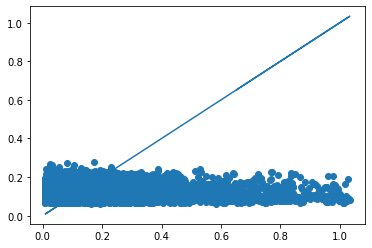

In [67]:
import matplotlib.pyplot as plt

plt.scatter(y_actual[:,0],y_pred[:,0])
plt.plot(y_actual[:,0],y_actual[:,0])